In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
sample = pd.read_csv('../confusion_processed/20190409_confusion.csv' )

In [5]:
sample.fillna(value='none', inplace=True)

In [6]:
sample.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,30,31
0,0,Not Confused,Not Confused,Not Confused,Confused,Not Confused,Confused,Not Confused,Not Confused,Confused,...,none,none,none,none,none,none,none,none,none,none
1,1,Not Confused,Not Confused,Not Confused,Not Confused,Not Confused,Confused,Not Confused,Not Confused,Confused,...,none,none,none,none,none,none,none,none,none,none
2,2,Not Confused,Not Confused,Confused,Not Confused,Not Confused,Not Confused,Not Confused,Not Confused,Confused,...,none,none,none,none,none,none,none,none,none,none
3,3,Not Confused,Confused,Not Confused,Not Confused,Confused,Confused,Not Confused,Confused,Not Confused,...,none,none,none,none,none,none,none,none,none,none
4,4,Not Confused,Confused,Not Confused,Not Confused,Not Confused,Not Confused,Not Confused,Not Confused,Not Confused,...,none,none,none,none,none,none,none,none,none,none


In [7]:
np.unique(sample.iloc[0, 1:].values, return_counts=True)

(array(['Confused', 'Not Confused', 'none'], dtype=object),
 array([ 5, 11, 16]))

In [8]:
emotions_list = ['Not Confused', 'Confused']

all_emotion_ratios = []
for row in range(sample.shape[0]):
    emotion_ratios = {key:0 for key in emotions_list}
    emotion, counts = np.unique(sample.iloc[row, 1:].values, return_counts=True)
    idx_none = emotion == 'none'
    emotion_not_none = emotion[~idx_none]
    ratio = counts[~idx_none]/np.sum(counts[~idx_none])
    for emo, rats in zip(emotion_not_none, ratio):
        emotion_ratios[emo] = rats
    all_emotion_ratios.append(emotion_ratios)

In [9]:
all_emotion_ratios

[{'Not Confused': 0.6875, 'Confused': 0.3125},
 {'Not Confused': 0.6666666666666666, 'Confused': 0.3333333333333333},
 {'Not Confused': 0.6, 'Confused': 0.4},
 {'Not Confused': 0.5384615384615384, 'Confused': 0.46153846153846156},
 {'Not Confused': 0.8, 'Confused': 0.2},
 {'Not Confused': 0.6363636363636364, 'Confused': 0.36363636363636365},
 {'Not Confused': 0.2727272727272727, 'Confused': 0.7272727272727273},
 {'Not Confused': 0.5, 'Confused': 0.5},
 {'Not Confused': 0.5, 'Confused': 0.5},
 {'Not Confused': 0.6, 'Confused': 0.4},
 {'Not Confused': 0.5555555555555556, 'Confused': 0.4444444444444444},
 {'Not Confused': 0.7777777777777778, 'Confused': 0.2222222222222222},
 {'Not Confused': 0.75, 'Confused': 0.25},
 {'Not Confused': 0.6666666666666666, 'Confused': 0.3333333333333333},
 {'Not Confused': 0.6842105263157895, 'Confused': 0.3157894736842105},
 {'Not Confused': 0.6875, 'Confused': 0.3125},
 {'Not Confused': 0.75, 'Confused': 0.25},
 {'Not Confused': 0.5714285714285714, 'Confus

Text(0, 0.5, 'Student Confused Probability')

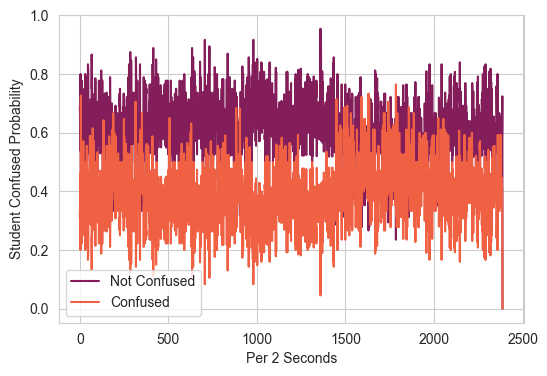

In [10]:
fig, ax = plt.subplots(figsize=(6, 4))
cmaps = sns.color_palette('rocket', n_colors=len(emotions_list))
for cmap, selected_emotions in zip(cmaps, emotions_list):
    sns.lineplot(x=np.arange(len([all_emotion_ratios[i][selected_emotions] for i in range(len(all_emotion_ratios))])),
        y=[all_emotion_ratios[i][selected_emotions] for i in range(len(all_emotion_ratios))], color=cmap, ax=ax, label=selected_emotions)
ax.set_xlabel('Per 2 Seconds')
ax.set_ylabel('Student Confused Probability')
# fig.savefig('confused_sample.png', bbox_inches='tight', dpi=300)

In [48]:
sns.color_palette('rocket', n_colors=len(emotions_list))


[(0.18643324, 0.09165431, 0.22699705),
 (0.38092887, 0.12061482, 0.32506528),
 (0.59096382, 0.10810205, 0.35847347),
 (0.7965014, 0.10506637, 0.31063031),
 (0.92676657, 0.29823282, 0.24285536),
 (0.95922872, 0.53307513, 0.3748895),
 (0.96592829, 0.73844258, 0.60053991)]

In [54]:
cmap

(0.96592829, 0.73844258, 0.60053991)